Exec CWD: /dx02/mc5601/github_public/arctic-energy-budget-analysis


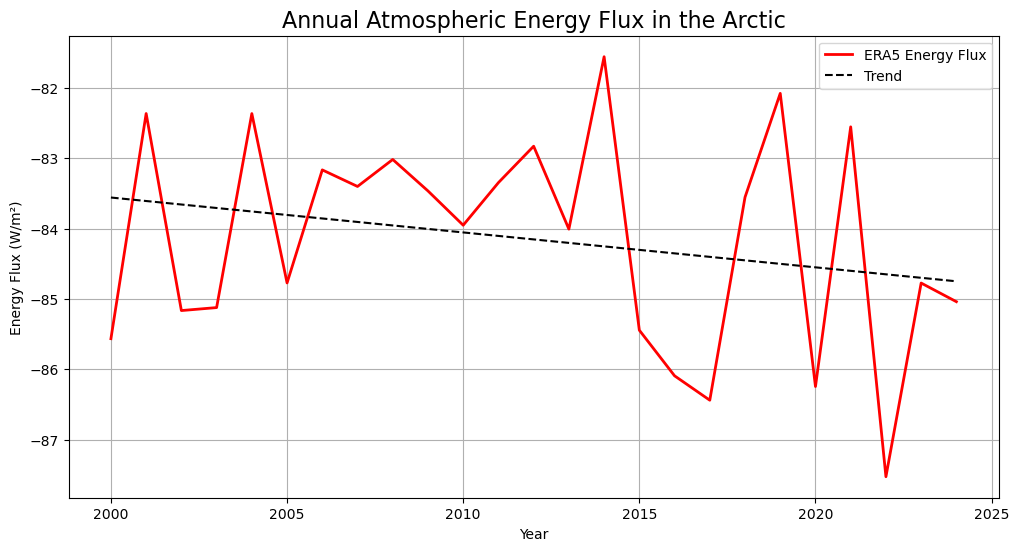

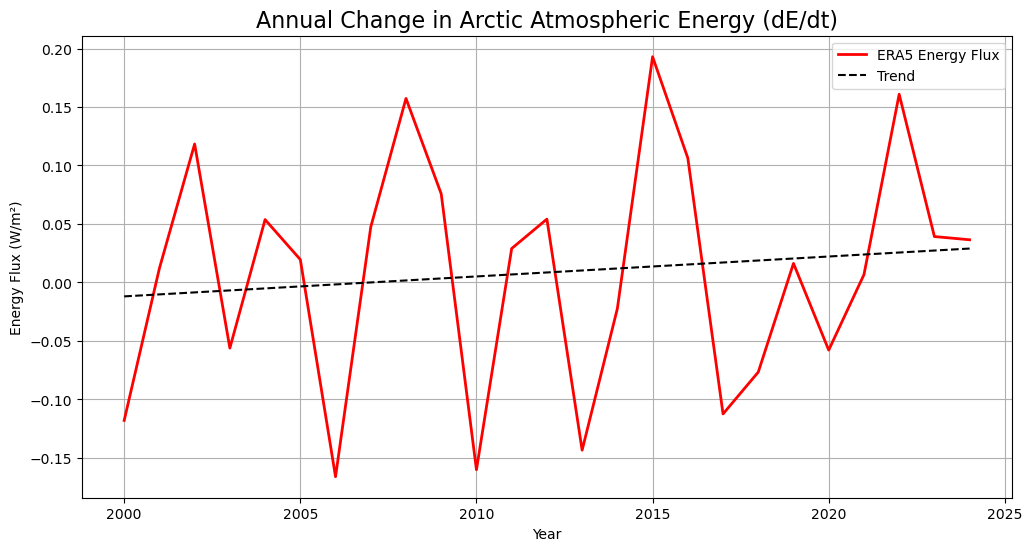

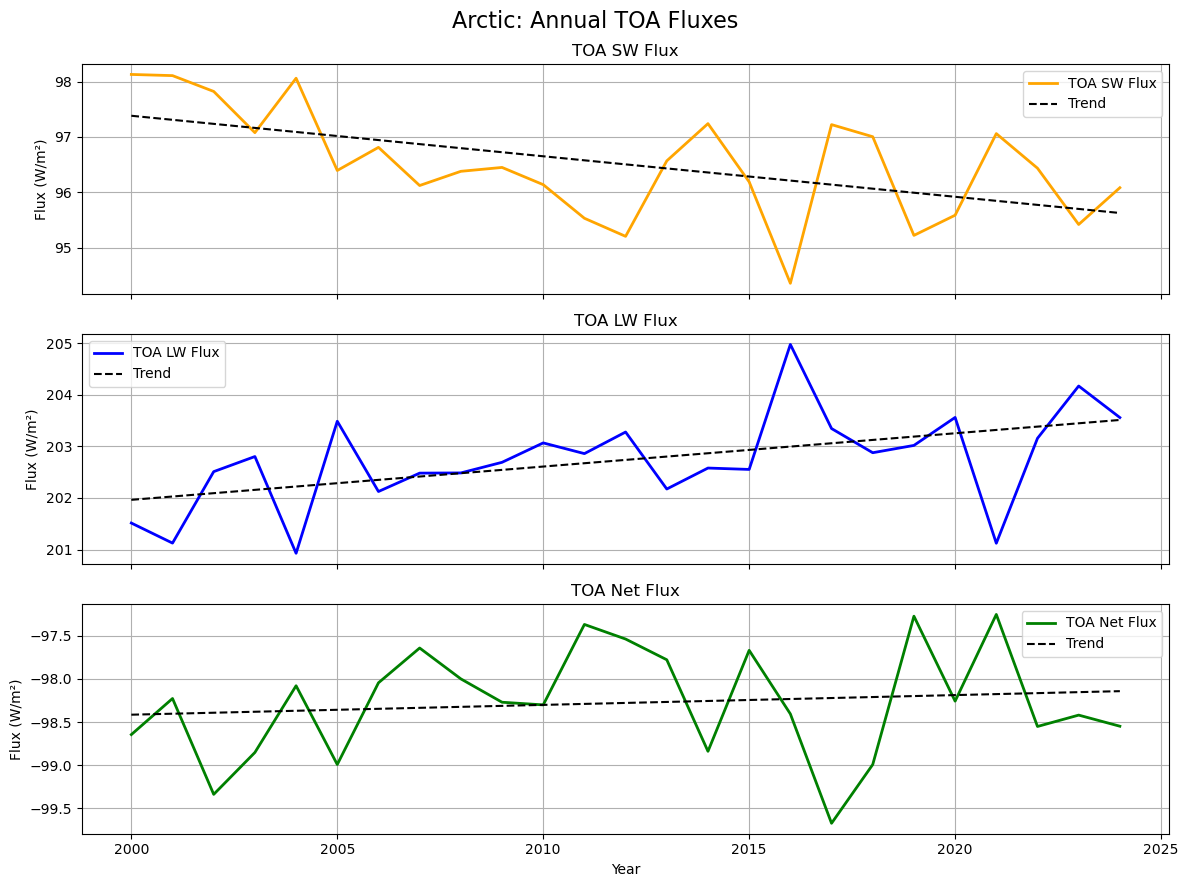

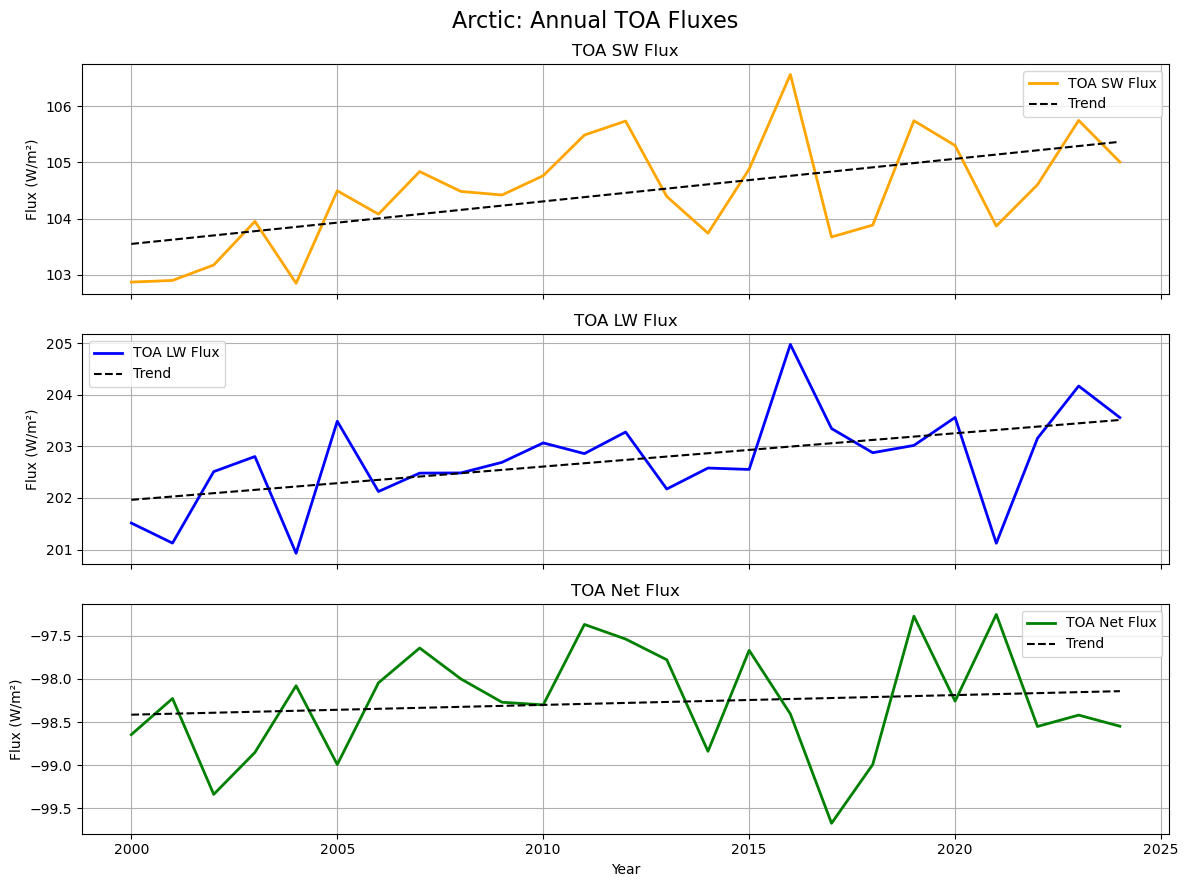

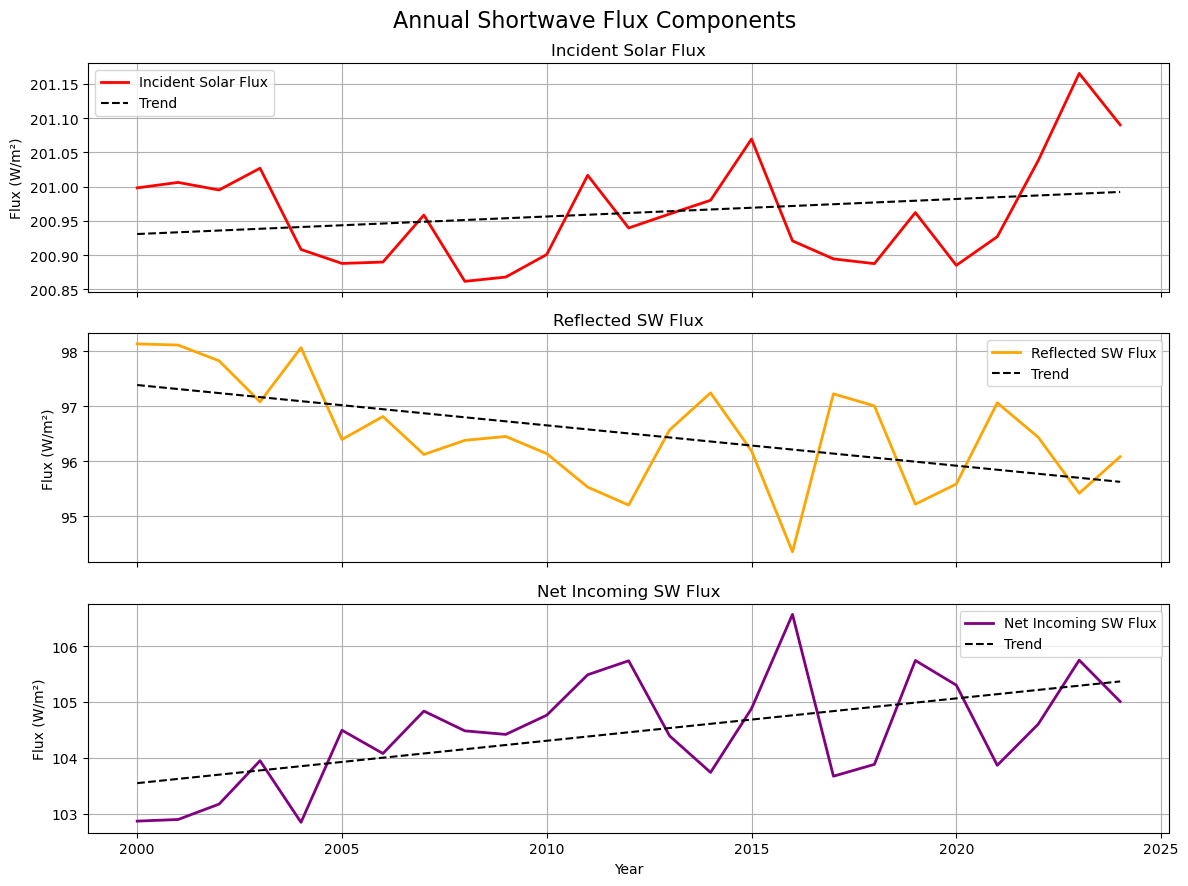

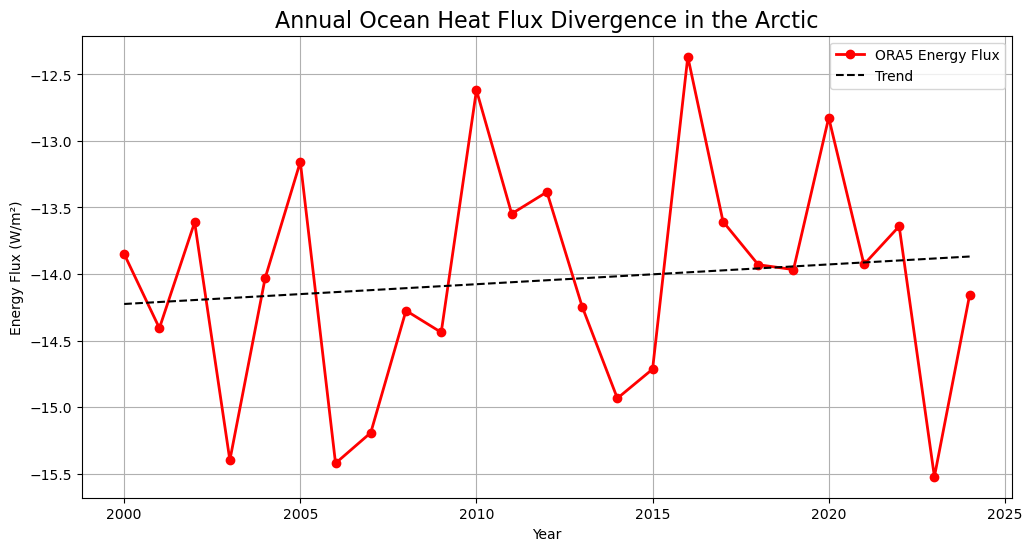

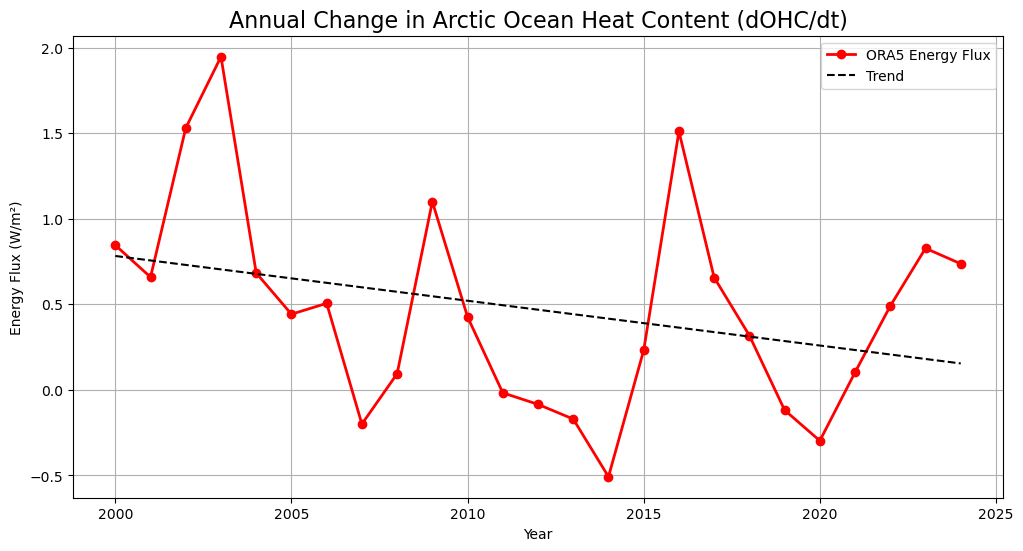

📊 Data summary:
   ERA5 annual: 25 years
   CERES annual: 25 years
   ORAS5 annual: 25 years
🎉 Ready for analysis!


In [1]:
# --- PATH BOOTSTRAP ADDED (auto) ---
import os, sys
from pathlib import Path
_cwd = Path.cwd().resolve()
_repo = _cwd.parent if _cwd.name == 'netflux' else _cwd
os.chdir(str(_repo))
if str(_repo) not in sys.path:
    sys.path.insert(0, str(_repo))
print('Exec CWD:', os.getcwd())
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
from io import StringIO
import warnings
warnings.filterwarnings('ignore')


old_stdout = sys.stdout
sys.stdout = StringIO()

try:
    print("🔄 Loading flux data...")
  
    from models.era_annual import (
        energy_flux_annual as era5_energydiv_yr,
        dE_dt as era5_dE_dt_yr
        
    )
    
    
    # CERES - importar variables directas
    from models.ceres_ebaf_annual import (
        toa_net_annual as ceres_toa_net_yr,
    )
    
    # ORAS5 - importar variables directas
    from models.ora5_annual import (
        F_div_artic as oras5_oceandiv_yr,
        dOHC_dt_artic as oras5_dOHC_dt_yr

    )
    
finally:
    # Restaurar output
    sys.stdout = old_stdout


print(f"📊 Data summary:")
print(f"   ERA5 annual: {len(era5_energydiv_yr)} years")


print(f"   CERES annual: {len(ceres_toa_net_yr)} years")


print(f"   ORAS5 annual: {len(oras5_oceandiv_yr)} years")



print("🎉 Ready for analysis!")

In [2]:
# Define the year range
arctic_years = np.arange(2000, 2025)

### --- CLASSIC METHOD (direct sum of products) ---
netflux_yr = ceres_toa_net_yr - era5_energydiv_yr - oras5_oceandiv_yr
print("✅ NetFlux (direct sum method) calculated.")

### --- RESIDUAL METHOD (proposed) ---
# Total heat uptake: sum ocean and atmospheric storage (from dOHC/dt and dE/dt)
total_heat_uptake_yr = oras5_dOHC_dt_yr + era5_dE_dt_yr


✅ NetFlux (direct sum method) calculated.


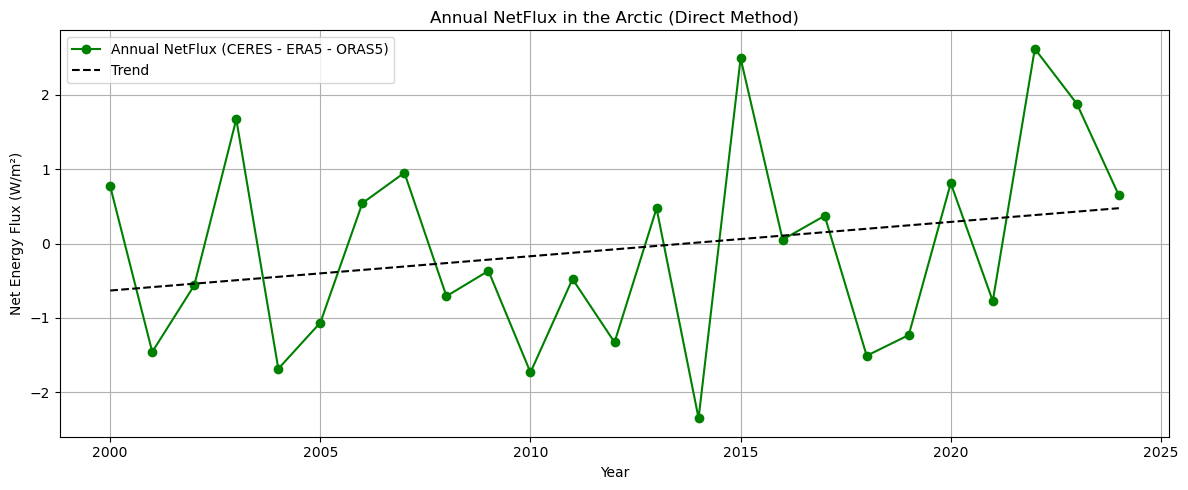

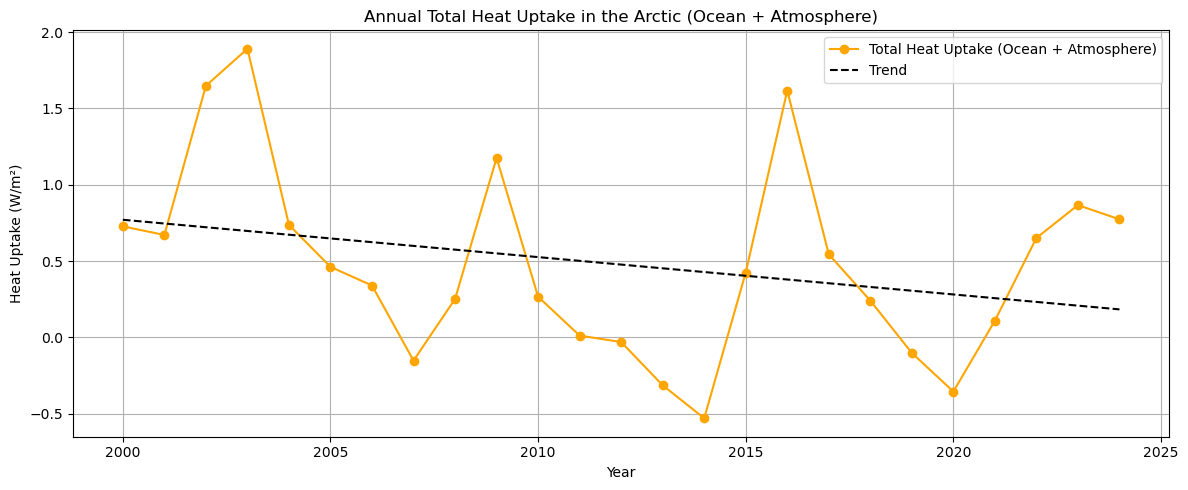

Mean CERES TOA net: -98.27915289878845
Mean ERA5 divergence: -84.15361494015514
Mean ORAS5 divergence: -14.047125109726416
Mean dOHC/dt: 0.46841725834392745
Mean dE/dt: 0.008541392355314491


In [3]:
# --- PLOT SECTION ---

# 1. Classic NetFlux
plt.figure(figsize=(12, 5))
plt.plot(arctic_years, netflux_yr, label='Annual NetFlux (CERES - ERA5 - ORAS5)', marker='o', color='green')
trend_netflux = np.poly1d(np.polyfit(arctic_years, netflux_yr, 1))
plt.plot(arctic_years, trend_netflux(arctic_years), 'k--', label='Trend')
plt.title('Annual NetFlux in the Arctic (Direct Method)')
plt.xlabel('Year')
plt.ylabel('Net Energy Flux (W/m²)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('plots/netflux_annual.png', dpi=300)
plt.show()

# 2. Total Heat Uptake 
plt.figure(figsize=(12, 5))
plt.plot(arctic_years, total_heat_uptake_yr, label='Total Heat Uptake (Ocean + Atmosphere)', marker='o', color='orange')
trend_heat = np.poly1d(np.polyfit(arctic_years, total_heat_uptake_yr, 1))
plt.plot(arctic_years, trend_heat(arctic_years), 'k--', label='Trend')
plt.title('Annual Total Heat Uptake in the Arctic (Ocean + Atmosphere)')
plt.xlabel('Year')
plt.ylabel('Heat Uptake (W/m²)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('plots/heat_uptake_annual.png', dpi=300)
plt.show()

print("Mean CERES TOA net:", np.mean(ceres_toa_net_yr))
print("Mean ERA5 divergence:", np.mean(era5_energydiv_yr))
print("Mean ORAS5 divergence:", np.mean(oras5_oceandiv_yr))
print("Mean dOHC/dt:", np.mean(oras5_dOHC_dt_yr))
print("Mean dE/dt:", np.mean(era5_dE_dt_yr))
